In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split

# Loading Data

In [2]:
df = pd.read_csv("data/mushrooms.csv", dtype="category")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   class                     8124 non-null   category
 1   cap-shape                 8124 non-null   category
 2   cap-surface               8124 non-null   category
 3   cap-color                 8124 non-null   category
 4   bruises                   8124 non-null   category
 5   odor                      8124 non-null   category
 6   gill-attachment           8124 non-null   category
 7   gill-spacing              8124 non-null   category
 8   gill-size                 8124 non-null   category
 9   gill-color                8124 non-null   category
 10  stalk-shape               8124 non-null   category
 11  stalk-root                8124 non-null   category
 12  stalk-surface-above-ring  8124 non-null   category
 13  stalk-surface-below-ring  8124 non-null   catego

## Test and Train Data

In [4]:
X = df.drop(columns=["class"])
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

# Descriptive Analysis

In [5]:
len(X_train.columns)

22

In [6]:
def stacked_bar(X_col, y, percent=False):
    tab = pd.crosstab(X_col, y)
    if percent:
        tab = tab.apply(lambda x: x*100/sum(x), axis=1)
    tab.sort_values(by=["e", "p"], inplace=True)    
    tab.plot(kind="bar", stacked=True, ax=plt.gca())
    plt.title(X_col.name)
    plt.xlabel(None)

In [7]:
def stacked_subplots(X, y, percent, n_rows=5, n_cols=5, figsize=[20, 20]):
    plt.figure(figsize=figsize)
    for i, col in enumerate(X.columns):
        plt.subplot(n_rows, n_cols, i + 1)
        stacked_bar(X_col=X[col], y=y, percent=percent)
    plt.show()

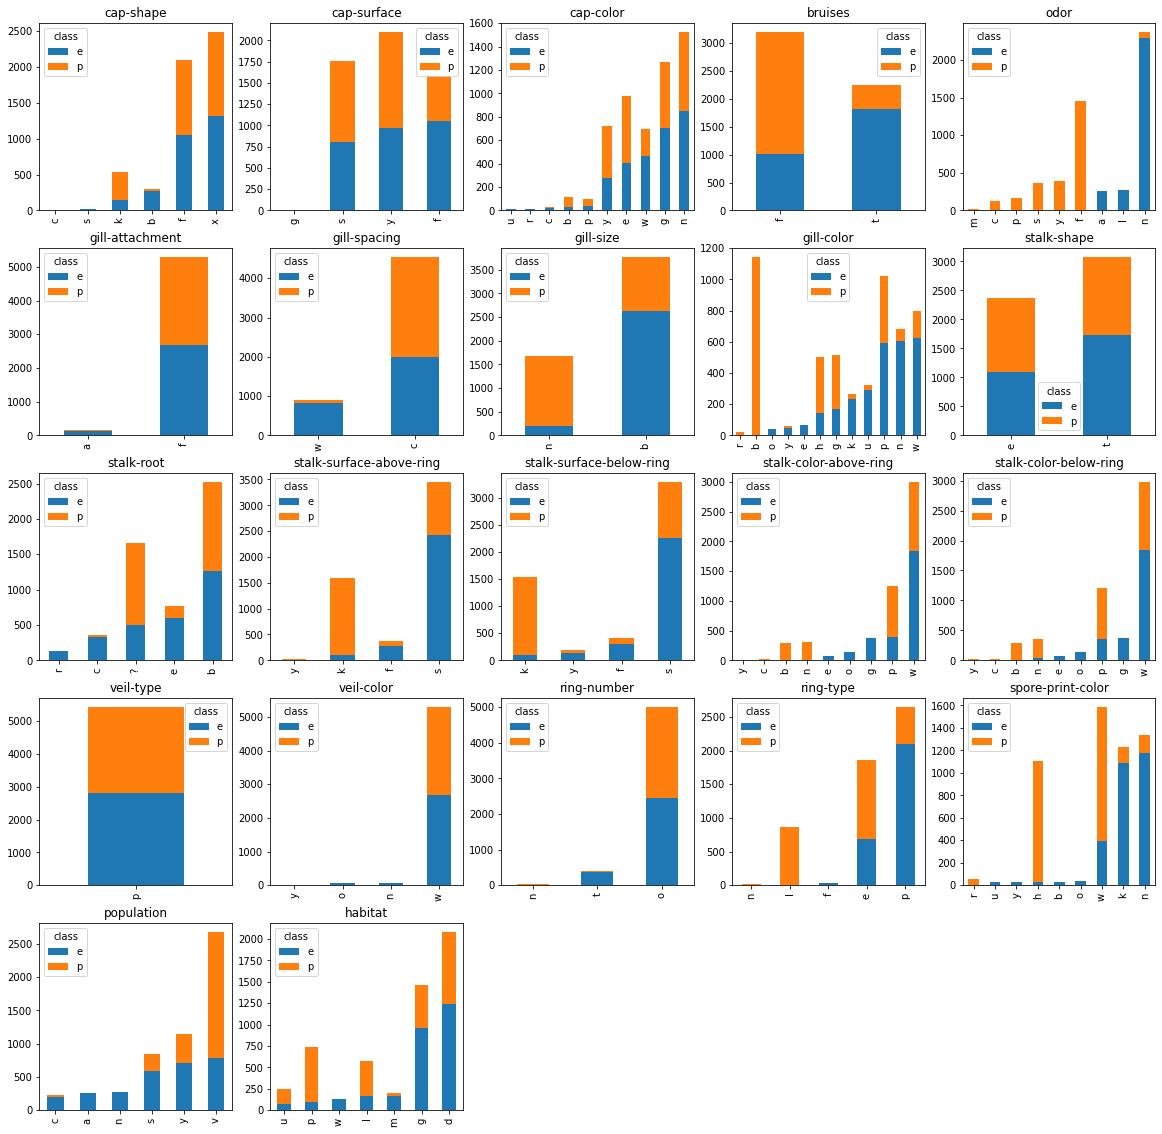

In [8]:
stacked_subplots(X=X_train, y=y_train, percent=False)

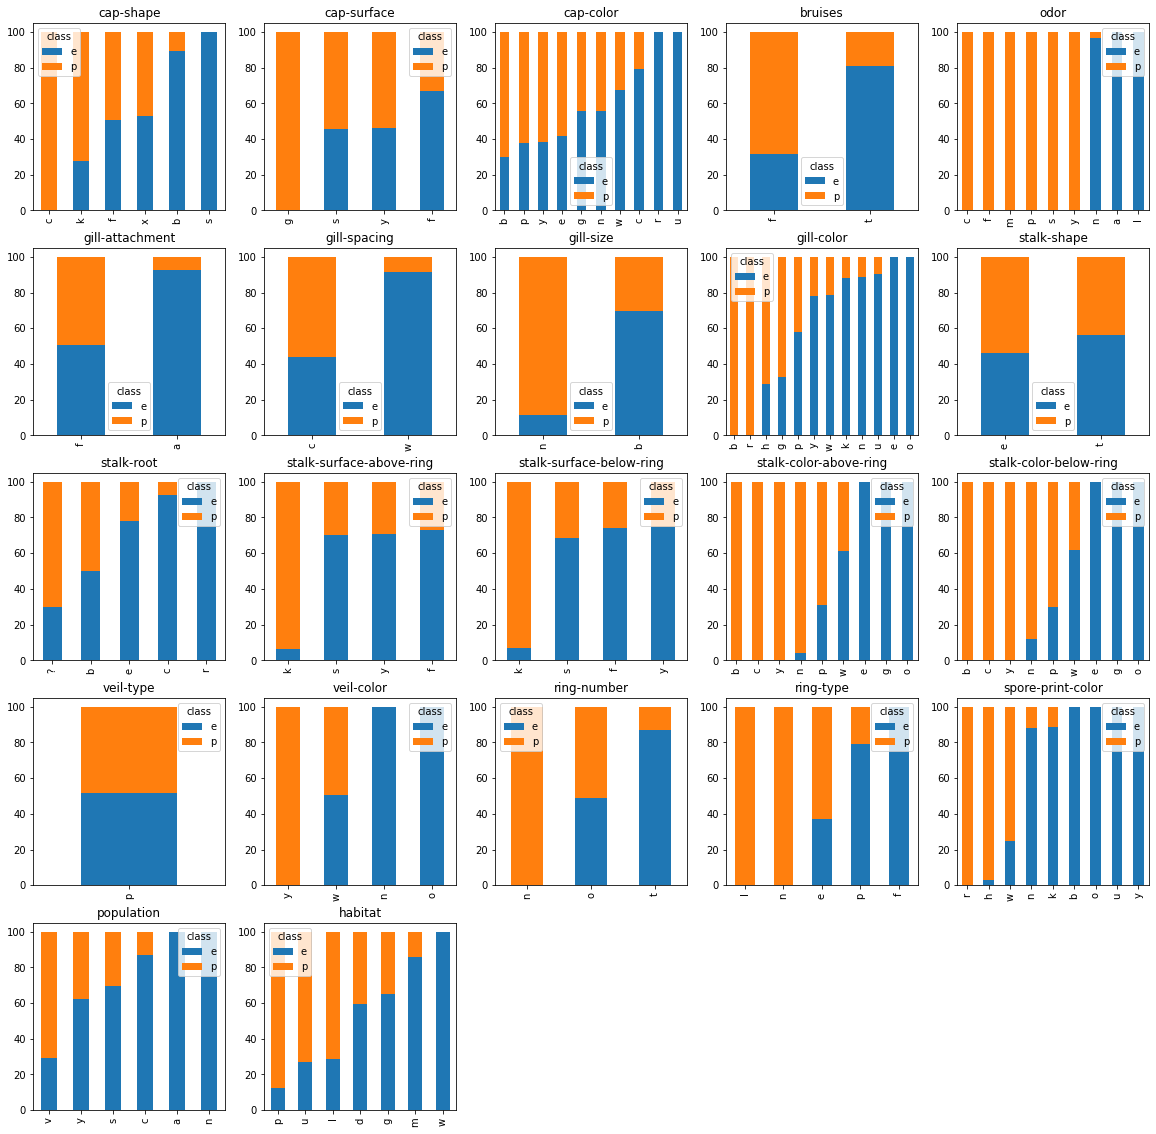

In [9]:
stacked_subplots(X=X_train, y=y_train, percent=True)

# Feature Selection

Following the book Data Science para Negócios (Provost e Fawcett, 2016), we can use information gain metric to select the most important features to predicting a target variable.

## Information Gain

In [10]:
def compute_entropy(x):
    if x["e"] == 0 or x["p"] == 0:
        return 0
    else:
        return - x["e"] * math.log(x["e"]) - x["p"] * math.log(x["p"])

In [11]:
def compute_information_gain(x, y):
    father_entropy = y.value_counts(normalize=True).to_frame().apply(compute_entropy, axis=0).iloc[0]
    
    tab = pd.crosstab(x, y)
    
    probs = tab.div(tab.sum(axis=1), axis=0)
    inf = probs.apply(compute_entropy, axis=1)
    
    totals = tab.sum(axis=1)
    shares = totals.div(totals.sum())
    
    sons_entropy = shares.mul(inf).sum()                                                              
    
    return father_entropy - sons_entropy

In [12]:
information_gain = dict()
X_cols = X_train.columns
for col in X_cols:
    information_gain[col] = compute_information_gain(x=X_train[col], y=y_train)
information_gain = pd.Series(information_gain)

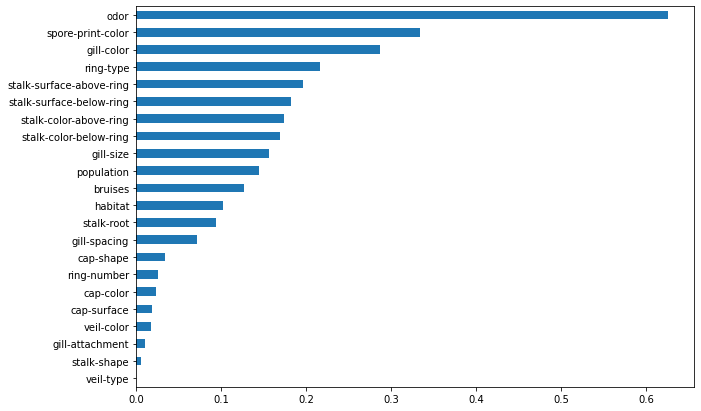

In [13]:
information_gain.sort_values(inplace=True)
information_gain.plot(kind="barh", figsize=[10, 7]);

In [14]:
low_info_gain_cols = information_gain[information_gain < .1].index.to_list()
low_info_gain_cols

['veil-type',
 'stalk-shape',
 'gill-attachment',
 'veil-color',
 'cap-surface',
 'cap-color',
 'ring-number',
 'cap-shape',
 'gill-spacing',
 'stalk-root']

# Modeling

# References

PROVOST, F.; FAWCETT, T. Data science para negócios: O que você precisa saber sobre mineração de dados e pensamento analítico de dados. 1ª edição ed. S.l.: Alta Books, 2016. 